# Introduction to Data Science
## Homework 3 Solutions

Student Name: Vaishali Pari

Student Netid: vp1096
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt

#These all need to be installed to both run and visualize a tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus #make sure you have this installed

from io import StringIO
%matplotlib inline

celldf=pd.read_csv('cell2cell_data.csv')
s=(len(celldf)*80)/100
rows = random.sample(celldf.index,s)
train_df= celldf.loc[rows]
test_df= celldf.drop(rows)
train_df
test_df

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
5,5.00,0.00,0.00,26,785,1,0,0,0,1,3,1
23,40.07,3.67,0.00,42,1278,0,0,0,0,0,1,1
28,170.92,35.00,0.33,10,302,1,1,0,0,1,2,1
30,199.00,88.67,40.00,19,368,1,0,0,0,0,2,1
41,80.94,87.67,46.67,13,386,1,0,0,0,0,2,1
51,29.39,7.67,3.00,13,377,1,0,0,0,1,2,1
56,5.00,0.00,0.00,43,1301,1,0,0,0,0,1,1
59,35.80,0.00,0.00,22,239,0,0,0,0,1,2,1
69,22.54,0.00,0.00,35,1061,0,1,0,0,1,1,1
70,56.63,13.00,1.33,21,259,1,0,0,0,0,2,1


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

Here we split the data randomly into train and test dataframes using numpy.
To prove that the data was randomly sampled, we can do a normality test and show the diffrence in the value. 

In [2]:
print('normality =', sp.stats.normaltest(celldf))
print('normality =', sp.stats.normaltest(train_df))

('normality =', NormaltestResult(statistic=array([  3.37911576e+04,   3.06807332e+04,   4.71021159e+04,
         5.77772970e+03,   6.12920946e+03,   1.96411696e+04,
         1.81681853e+03,   3.02005932e+04,   9.52136957e+03,
         3.00932835e+03,   4.40133812e+04,   5.43618858e-02]), pvalue=array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.97318513])))
('normality =', NormaltestResult(statistic=array([  2.78316091e+04,   2.43734029e+04,   3.79434488e+04,
         4.64409704e+03,   4.93653058e+03,   1.56506123e+04,
         1.44815170e+03,   2.43778339e+04,   7.63601890e+03,
         2.38149327e+03,   3.53392009e+04,   3.48073980e-01]), pvalue=array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.84026582])))


3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(train_df.drop('churndep',1),train_df.churndep)
print('Accuracy of DTC on training set: {:.2f}'.format(clf.score(train_df.drop('churndep',1),train_df.churndep)))
print('Accuracy of DTC on test set: {:.2f}'.format(clf.score(test_df.drop('churndep',1),test_df.churndep)))

Accuracy of DTC on training set: 1.00
Accuracy of DTC on test set: 0.53


4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

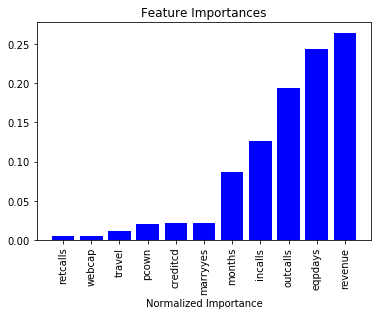

In [4]:
features=train_df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), features[indices],rotation=90)
plt.xlabel('Normalized Importance')2

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [5]:
features = train_df[['revenue', 'eqpdays', 'outcalls','churndep']].copy()
features.corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.223584,0.500212,-0.015506
eqpdays,-0.223584,1.000000,-0.245320,0.114727
outcalls,0.500212,-0.245320,1.000000,-0.037492
churndep,-0.015506,0.114727,-0.037492,1.000000


The top 3 most important features are revenue, eqpdays and outcalls.
revenue and eqpdays have a negative correlation.
revenue and out call have a positive correlation.
eqpdays and outcalls have a negative correlation.
Most of the customers who have high eqpdays value have lesser possiblity of churn(+ve corr)
Most of the customers who have high outcalls value have higher possiblity of churn(-ve corr)
Most of the customers who have high revenue value have higher possiblity of churn(-ve corr)

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [6]:
print 'predicting churn for train_df'
x=clf.predict(train_df.drop('churndep',1), check_input=True)
print x
print('Accuracy of DTC on training set: {:.2f}'.format(clf.score(train_df.drop('churndep',1),x)))
print 'predicting churn for test_df'
y=clf.predict(test_df.drop('churndep',1), check_input=True)
print y
print('Accuracy of DTC on test set: {:.2f}'.format(clf.score(test_df.drop('churndep',1),y)))

predicting churn for train_df
[1 0 1 ..., 0 0 1]
Accuracy of DTC on training set: 1.00
predicting churn for test_df
[1 1 1 ..., 0 1 0]
Accuracy of DTC on test set: 1.00


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [11]:
leaf=np.arange(1,20,2)
split=np.arange(2,22,2)
for x in range(0, 9):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf[x],min_samples_split=split[x])
    clf=clf.fit(train_df.drop('churndep',1),train_df.churndep)
    print "Leaf=%d split=%d" % (leaf[x],split[x])
    print('Accuracy of DTC on training set : {:.2f}'.format(clf.score(train_df.drop('churndep',1),train_df.churndep)))
    testacc=clf.score(test_df.drop('churndep',1),test_df.churndep)
    print('Accuracy of DTC on test set: {:.2f}'.format(testacc))

Leaf=1 split=2
Accuracy of DTC on training set : 1.00
Accuracy of DTC on test set: 0.53
Leaf=3 split=4
Accuracy of DTC on training set : 0.90
Accuracy of DTC on test set: 0.53
Leaf=5 split=6
Accuracy of DTC on training set : 0.82
Accuracy of DTC on test set: 0.53
Leaf=7 split=8
Accuracy of DTC on training set : 0.79
Accuracy of DTC on test set: 0.54
Leaf=9 split=10
Accuracy of DTC on training set : 0.76
Accuracy of DTC on test set: 0.54
Leaf=11 split=12
Accuracy of DTC on training set : 0.74
Accuracy of DTC on test set: 0.54
Leaf=13 split=14
Accuracy of DTC on training set : 0.72
Accuracy of DTC on test set: 0.55
Leaf=15 split=16
Accuracy of DTC on training set : 0.71
Accuracy of DTC on test set: 0.55
Leaf=17 split=18
Accuracy of DTC on training set : 0.70
Accuracy of DTC on test set: 0.54


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

The default option gave an accuracy of 1, and we can suspect over fitting.
so chose the next nearest numbers and found the change in accuracy to be small, so took the range of odd leaf from 1 to 20 and even split from 2 to 22.
I chose the range by increnemting 2 on both leaf and split. we can even experiment by keeping one constant and just incrementing the other and find how the accuracy changes.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

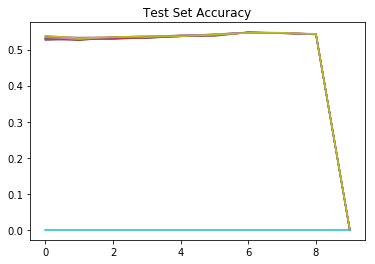

In [21]:
test_acc=np.ndarray((10, 10))
for x in range(0, 9):
    for y in range(0, 9):
        clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf[x],min_samples_split=split[y])
        clf=clf.fit(train_df.drop('churndep',1),train_df.churndep)
        test_acc[x][y]=clf.score(test_df.drop('churndep',1),test_df.churndep)
plt.title('Test Set Accuracy')
plt.plot(test_acc)
plt.show()
                                 

4. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

The accuracy of test data is around 0.53-0.55 for the range chosen above. It does not show much variation even when the range is altered. 
The accuracy of training set decreases drastically with increase in the split and leaf. 

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

The churn prediction model built here can be used in the real market for developing business.
we can run the model on the exicsting customer data and predict the customers who might churn. By finding that we can provide them some offer which might hold them back.
By analysing the previously churned customers, and find patters or reasons for their churn, and prevent the exixting customers from facing the same scenario.
Thus by using this model we can improve the business.


### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [114]:
import pandas as pd
import numpy as np
ts_df=pd.read_csv('cases.csv', parse_dates=['YEAR'],index_col='YEAR')
ts_df

,YFCASES
YEAR,
1700-01-01 00:00:00,5.0
1701-01-01 00:00:00,11.0
1702-01-01 00:00:00,16.0
1703-01-01 00:00:00,23.0
1704-01-01 00:00:00,36.0
1705-01-01 00:00:00,58.0
1706-01-01 00:00:00,29.0
1707-01-01 00:00:00,20.0
1708-01-01 00:00:00,10.0


2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

/Users/vaishalipari/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


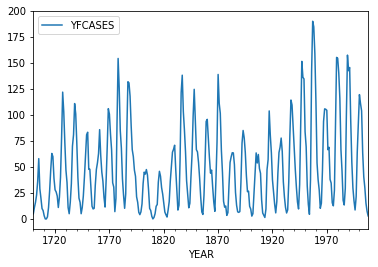

In [115]:
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.api import qqplot
ts_df.plot()
plt.show()

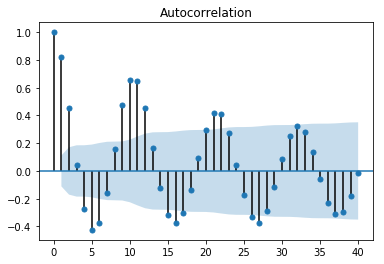

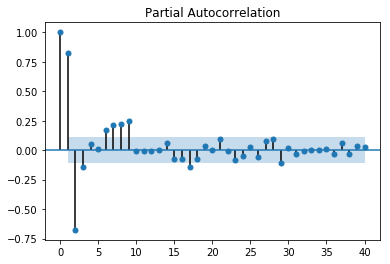

In [116]:
yellowFever=ts_df['YFCASES']
fig = sm.graphics.tsa.plot_acf(yellowFever, lags=40)
plt.show()
fig = sm.graphics.tsa.plot_pacf(yellowFever, lags=40)
plt.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


ACF shows a sine-wave shape pattern; 
PACF has a spike at lag 1 and 2;
By rule 2, we take:
p=2 q=0 and follow AR(2) model

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [133]:
sm.stats.durbin_watson(acf(ts_df.YFCASES))

0.2797954251221777

In [ ]:
The autocorrelation from the acf plot averages around 0.2 which matches with our DW value of acf result.

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


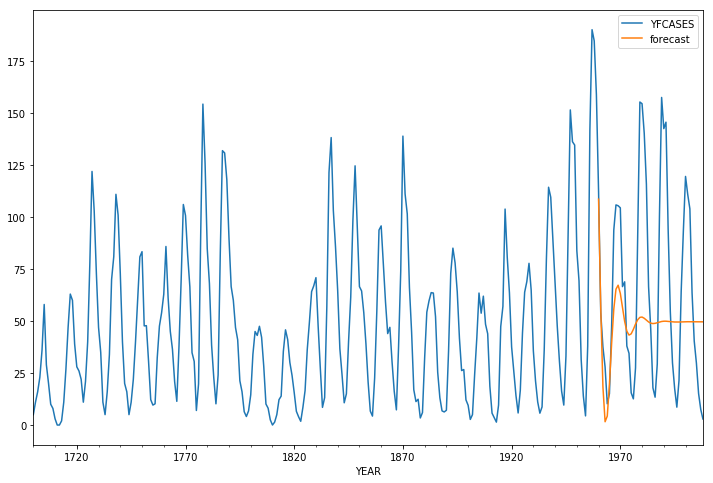

In [122]:
yf=ts_df.YFCASES.astype(float)
results = sm.tsa.ARMA(yf,(2,0)).fit()
ts_df['forecast'] = results.predict(start = 260, end= 309, dynamic= True)  
ts_df[['YFCASES', 'forecast']].plot(figsize=(12, 8))
plt.show()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=41.736017448911511, pvalue=8.6524472974138723e-10)


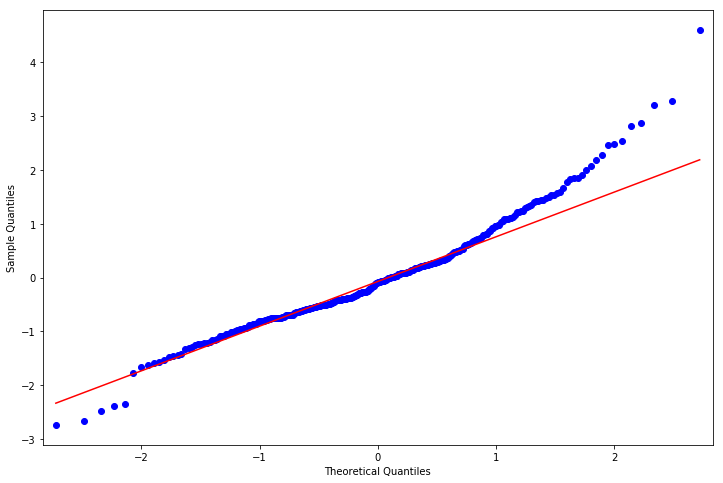

In [139]:
resid = results.resid
print(stats.normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()


NormaltestResult(statistic=41.736017448911511, pvalue=8.6524472974138723e-10)
Performing a normality test to show that the residuals come from a normal distribution.
The line of fit and the plots align well, this shows the normal distribution.
From the statistics we can say that p<=alpha and it doesnot follow normal distribution.
Thus the results of the qqplot and the hypothesis test do not align.

7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


DW Stats after the calculation of the ARMA resudals: 2.145827
[   2.28070133    5.69032788    5.93840566    8.62367314    8.74169498
    9.06526304    9.72448901   10.12119574   21.83902293   34.44126268
   47.00886132   52.19562774   52.28869561   52.36896701   53.81102178
   54.38682161   54.42062129   56.44010875   58.64007013   58.65778659
   61.68791942   67.32238975   71.51011117   74.42316845   74.49868176
   75.0286926    84.25383561   85.2744999    86.56047469   86.56522745
   86.61601708   92.87272696   93.66769506   93.72212508   93.98467563
  101.03628156  101.64019849  103.32815412  103.60659427  103.60675349] [  1.30992627e-01   5.81247369e-02   1.14645682e-01   7.12258886e-02
   1.19821338e-01   1.69940856e-01   2.04731412e-01   2.56622432e-01
   9.40340114e-03   1.55451414e-04   2.14272857e-06   5.72394558e-07
   1.20112538e-06   2.43502717e-06   2.82488576e-06   4.48262906e-06
   8.48580945e-06   7.59323021e-06   6.33766580e-06   1.14659824e-05
   7.06855968e-06   1.73

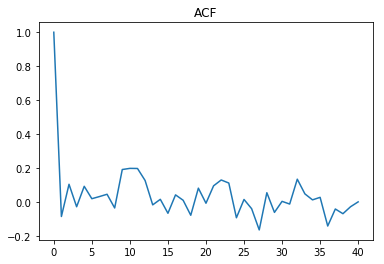

In [159]:
dfoutput=sm.stats.durbin_watson(resid)
print "DW Stats after the calculation of the ARMA resudals: %f" % dfoutput
acf, Q, pvalue = sm.tsa.acf(results.resid, nlags=40,  qstat=True, unbiased=True)
plt.plot(acf)
plt.title('ACF')
plt.show
print Q, pvalue

The acf has improved; can be viewed in the above graph.
The DW stats also interpret the auto correlation befor it was 0.27, now DW with the result resudals of arma is 2.14
The Q and p values also have improved from the previous observations. 

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



In [164]:
from pandas import datetime
startyear=datetime(2009,1,1)
endyear=datetime(2012,1,1)
predict=results.predict(start=startyear,end=endyear)
predict

2009-01-01    13.662904
2010-01-01    31.797825
2011-01-01    49.606231
2012-01-01    61.884409
Freq: AS-JAN, dtype: float64

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [169]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
startyear=datetime(1700,1,1)
endyear=datetime(2008,1,1)
predict=results.predict(start=startyear,end=endyear)
mae=mean_absolute_error(yellowFever, predict)
print "MAE: %f" % mae
mse=mean_squared_error(yellowFever, predict)
print "MSE: %f" % mse

MAE: 12.625231
MSE: 280.128292
